<a href="https://colab.research.google.com/github/sirleudo/praticas/blob/master/Regress%C3%A3o_Log%C3%ADstica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regressão Logística

In [3]:
# importar os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# configurar o notebook
sns.set_style()

# importar o arquivo
df = pd.read_csv("http://dl.dropboxusercontent.com/s/6d91j46mkcdj4qv/heart-disease-clean.csv?dl=1")

# ver as primeiras entradas
print(f'Tamanho do df: {(df.shape)}\n')
df.head()

Tamanho do df: (303, 14)



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
# importar scikit-learn para criar modelo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [13]:
# 1. escolher e importar o modelo
from sklearn.linear_model import LogisticRegression

# 2. instanciar e escolher os hyperparameters
model = LogisticRegression

# 3. separar os dados entre feature matrix e target vector
X = df.drop('num', axis=1)
y = df['num']

# 3.1. dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2. padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. fazer previsões em cima de novos dados
X_test = scaler.transform(X_test) # padronizar os dados de teste
y_pred = model.predict(X_test)

TypeError: ignored

In [14]:
# 1. escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# 2. Instanciar e escolher os hyperparameters
model = LogisticRegression()

# 3. Separar os dados entre feature matrix e target vector 
X = df.drop('num', axis=1)
y = df['num']

# 3.1 Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y)

# 3.2 Padronizar os dados de treino
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

# 4. Fit do modelo (treinar)
model.fit(X_train, y_train)

# 5. Fazer previsões em cima de novos dados
X_test = scaler.transform(X_test)  # padronizar os dados de teste
y_pred = model.predict(X_test)

In [15]:
# imprimir relatorio de classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        41
           1       0.86      0.71      0.78        35

    accuracy                           0.82        76
   macro avg       0.82      0.81      0.81        76
weighted avg       0.82      0.82      0.81        76



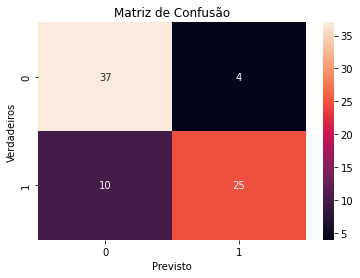

In [16]:
fi, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title('Matriz de Confusão')
ax.set_ylabel('Verdadeiros')
ax.set_xlabel('Previsto')

plt.show()



In [17]:
# probabilidade em cima do dataset de teste
y_prob = model.predict_proba(X_test)

print('y_pred: \n', y_pred[0:5])
print('\ny_proba: \n', y_prob[0:5])

y_pred: 
 [0 1 0 1 1]

y_proba: 
 [[0.90428161 0.09571839]
 [0.06050215 0.93949785]
 [0.94818311 0.05181689]
 [0.08806902 0.91193098]
 [0.21719471 0.78280529]]
